In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Extrapolate data from the JRC Excel file**

In [3]:
# Load the file
file_path = "global_flood_depth-damage_functions.xlsx" 
sheet_name = "Damage functions"

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=2, usecols="A:H")
df['Damage class'] = df['Damage class'].ffill()
df

,Damage class,Flood depth [m],EUROPE,North AMERICA,Centr&South\nAMERICA,ASIA,AFRICA,OCEANIA
0,Residential buildings,0.0,0.000000,0.201805,0,0.000000,0,0
1,Residential buildings,0.5,0.250000,0.44327,0.490886,0.326557,0.219925,0.475418
2,Residential buildings,1.0,0.400000,0.582755,0.711294,0.494050,0.378227,0.640393
3,Residential buildings,1.5,0.500000,0.682522,0.842026,0.616572,0.530589,0.714615
4,Residential buildings,2.0,0.600000,0.783957,0.949369,0.720712,0.635637,0.787726
5,Residential buildings,3.0,0.750000,0.854349,0.983637,0.869528,0.81694,0.92878
6,Residential buildings,4.0,0.850000,0.92367,1,0.931487,0.903435,0.967382
7,Residential buildings,5.0,0.950000,0.958523,1,0.983604,0.957152,0.982795
8,Residential buildings,6.0,1.000000,1,1,1.000000,1,1
9,Commercial buildings,0.0,0.000000,0.018405,0,0.000000,-,0


**Define the type of building and visualize the flood depth - damage function**

Type of buildings:
- Residential buildings
- Commercial buildings
- Industrial buildings

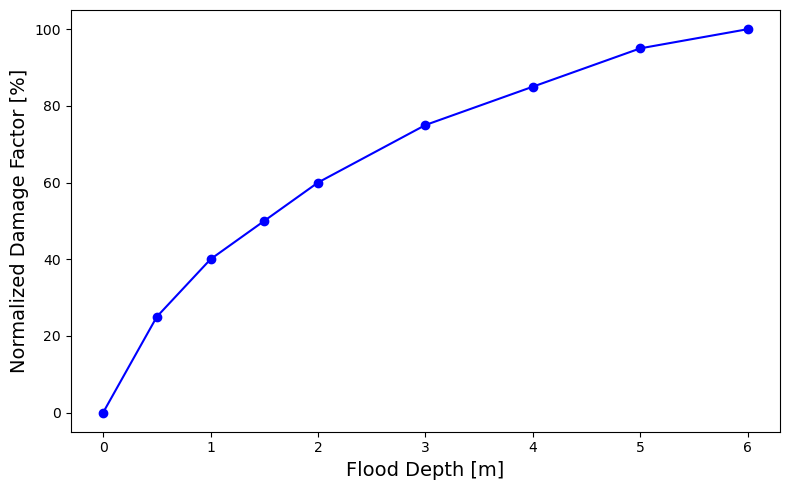

In [4]:
build_type = 'Residential buildings'

# Extrapolate values
build_df = df[df['Damage class'] == build_type]

# Plot figure
plt.figure(figsize=(8, 5), dpi = 100)
plt.plot(build_df['Flood depth [m]'], build_df['EUROPE'] * 100, marker='o', color='blue')

plt.xlabel('Flood Depth [m]', fontsize=14)
plt.ylabel('Normalized Damage Factor [%]', fontsize=14)

plt.tight_layout()
plt.show()

**After adjust values for The Netherlands and include corrections (some default values are provided), find the damage cost**

Consumer Price Index: https://www.cbs.nl/en-gb/figures/detail/71905eng
    
Construction cost (2010 EUR)
- Residential: 1559
- Commercial: 1612
- Industrial: 1039

Max damage content/inventory:
- Residential: 0.5
- Commercial: 1
- Industrial: 1.5
    
Undamageable part:
- Concrete: 0.4
- Masonry: 0.4
- Wood: 0

Max damage adjustment for concrete/masonry/brick 
- Smooth wall: 1
- Corrugated wall: 0.6
- Mud wall: 0.2
- Rural: 0.33

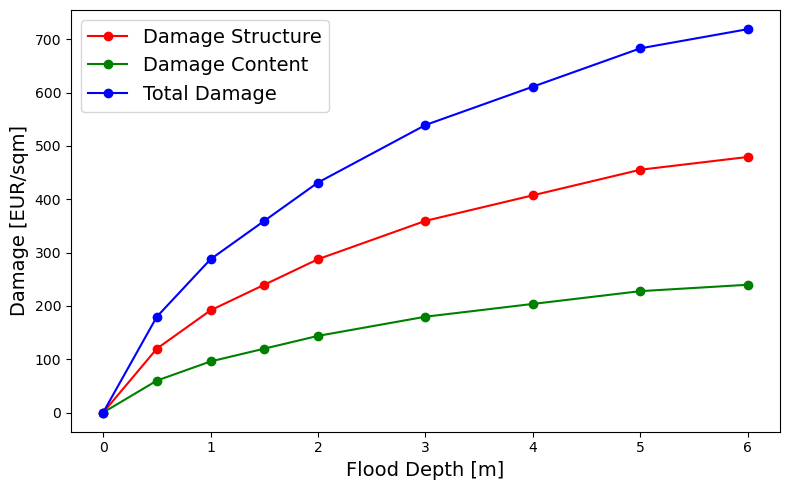

In [6]:
# Set values
constr_cost = 1559
cont_inv = 0.5
undam = 0.4
damage_adj = 0.6

cpi_2020 = 2554.8
cpi_current = 3636.7

# Max damage structure, including current year correction
dam_struct = constr_cost*0.6*(1-undam)*damage_adj*cpi_current/cpi_2020
dam_content = dam_struct*cont_inv
tot_dam = dam_struct + dam_content

# Plot figure
plt.figure(figsize=(8, 5), dpi = 100)
plt.plot(build_df['Flood depth [m]'], [i*dam_struct for i in build_df['EUROPE']], marker='o', color='red', label='Damage Structure')
plt.plot(build_df['Flood depth [m]'], [i*dam_content for i in build_df['EUROPE']], marker='o', color='green', label='Damage Content')
plt.plot(build_df['Flood depth [m]'], [i*tot_dam for i in build_df['EUROPE']], marker='o', color='blue', label='Total Damage')

plt.legend(fontsize=14)
plt.xlabel('Flood Depth [m]', fontsize=14)
plt.ylabel('Damage [EUR/sqm]', fontsize=14)

plt.tight_layout()
plt.show()

**Build resilience curve for a specific intensity level**

1. Extrapolate flood depth from: https://www.atlasleefomgeving.nl/en/node/19261 or https://www.klimaateffectatlas.nl/en/viewer 
2. Impeding factors can be derived from Arup REDi_Flood (https://www.redi.arup.com/)

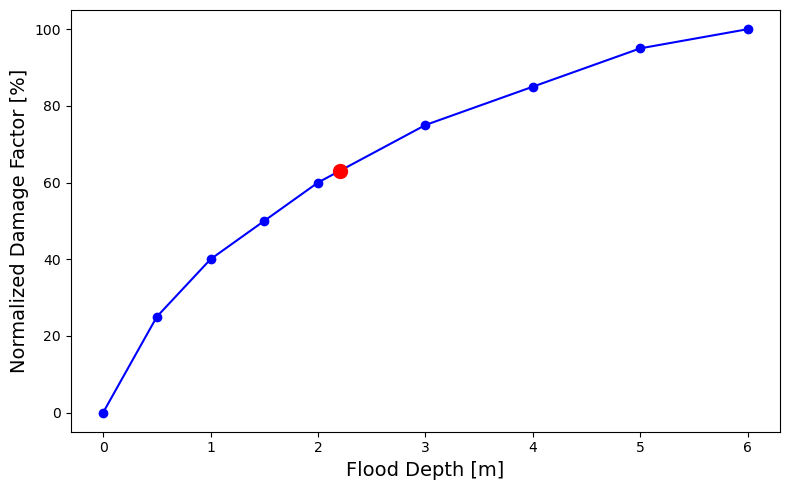

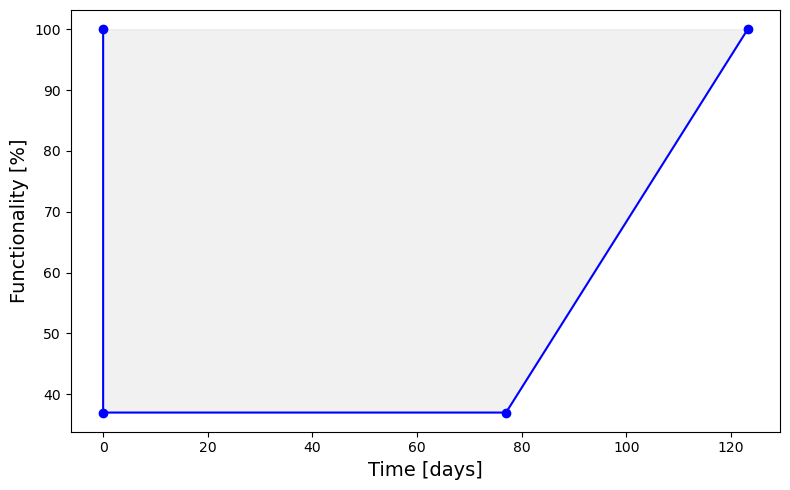

Resilience score: 0.49


In [7]:
# Set values
flood_depth = 2.2 #m
imp_factors = 77 #days
rep_time = 0.6*imp_factors

# Extrapolate value from curve
damage_value = np.interp(flood_depth, build_df['Flood depth [m]'], build_df['EUROPE'])*100

# Plot figure
plt.figure(figsize=(8, 5), dpi = 100)
plt.plot(build_df['Flood depth [m]'], build_df['EUROPE'] * 100, marker='o', color='blue')
plt.scatter(flood_depth, damage_value, color='red', marker='o', zorder=5, s = 100)

plt.xlabel('Flood Depth [m]', fontsize=14)
plt.ylabel('Normalized Damage Factor [%]', fontsize=14)

plt.tight_layout()
plt.show()

# Resilience curve (linear recovery assumption)
time_data = [0, 0, imp_factors, imp_factors+rep_time]
res_data = [100, 100-damage_value, 100-damage_value, 100]

plt.figure(figsize=(8, 5), dpi = 100)
plt.plot(time_data, res_data, marker='o', color='blue')
plt.fill_between(time_data, res_data, 100, color='lightgrey', alpha=0.3)

plt.xlabel('Time [days]', fontsize=14)
plt.ylabel('Functionality [%]', fontsize=14)

plt.tight_layout()
plt.show()

# Compute resilience value
area_under_curve = np.trapz(res_data, time_data)
total_time = time_data[-1]
ideal_area = 100 * total_time

res_score = area_under_curve / ideal_area

print(f"Resilience score: {res_score:.2f}")